# use below script to see output of whole code.


In [1]:

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_Interactivity = 'all'


# install/import packages libraries

In [13]:

from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.linear_model import LogisticRegression # regression
from sklearn.metrics import classification_report # to create all accuracy matrices
from sklearn.model_selection import GridSearchCV # hyper parameter optimization
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn import preprocessing # EDA

import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization

from pandas import get_dummies # EDA

import matplotlib as mpl  # visualization
import xgboost as xgb # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import matplotlib # visualization
import warnings # EDA
import sklearn # machine learning
import scipy  # EDA
import json # EDA
import sys # EDA
import csv # EDA
import os # to work with the the work libraries / system related variables
import math

# #Read house price train and test dataset

In [14]:


house_train = pd.read_csv('C:\\Users\\Anju\\Desktop\\R\\Datasets\\house prices adavanced regression techniques\\train.csv')
house_test =  pd.read_csv('C:\\Users\\Anju\\Desktop\\R\\Datasets\\house prices adavanced regression techniques\\test.csv')   



# Number of rows and columns in train dataframe.

In [4]:
house_train.shape


(1460, 82)

In [5]:
house_test.shape

(1459, 80)

# Check column names.

In [6]:

house_train.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDri

In [7]:

# in test dataset, Saleprice and X3 columns are missing.
house_test.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,X3
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,677
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,4
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,67
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,56


# Check Missing values

In [15]:

flag_miss = house_train.isna().sum().any()
flag_miss


True

In [16]:
flag_miss = house_test.isna().sum().any()
flag_miss

True

# Code to display all columns of a dataset

In [11]:
pd.set_option('display.max_columns', None)

# Finding which columns have the missing values.

In [17]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)

In [18]:
#before imputing: - train dataset
check_missing_data(house_train)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,X3
Total,0,0,0,259,0,0,1369,0,0,0,...,1453,1179,1406,0,0,0,0,0,0,0
Percent,0,0,0,0.00177397,0,0,0.00937671,0,0,0,...,0.00995205,0.00807534,0.00963014,0,0,0,0,0,0,0
Types,int64,int64,object,float64,int64,object,object,object,object,object,...,object,object,object,int64,int64,int64,object,object,int64,int64


In [19]:
# impute the missing data for train dataset
house_train.LotFrontage= house_train.LotFrontage.fillna(np.mean(house_train.LotFrontage))
house_train.Alley = house_train.Alley.fillna('Grvl')
house_train.MasVnrType = house_train.MasVnrType.fillna('Stone')
house_train.MasVnrArea = house_train.MasVnrArea.fillna(np.mean(house_train.MasVnrArea))
house_train.BsmtQual = house_train.BsmtQual.fillna('Gd')
house_train.BsmtCond = house_train.BsmtCond.fillna('TA')                                                    
house_train.BsmtExposure = house_train.BsmtExposure.fillna('Gd')
house_train.BsmtFinType1 = house_train.BsmtFinType1.fillna('GLQ')
house_train.BsmtFinType2 = house_train.BsmtFinType2.fillna('UNF')
house_train.Electrical = house_train.Electrical.fillna('Other')
house_train.FireplaceQu = house_train.FireplaceQu.fillna('Other')
house_train.GarageType = house_train.GarageType.fillna('Other')
house_train.GarageFinish = house_train.GarageFinish.fillna('Other')                                                                                                              
house_train.GarageQual = house_train.GarageQual.fillna('Other')
house_train.GarageCond = house_train.GarageCond.fillna('Other') 
house_train.GarageYrBlt = house_train.GarageYrBlt.fillna('NA')   
house_train.PoolQC = house_train.PoolQC.fillna('Other')                                                         
house_train.Fence = house_train.Fence.fillna('Other') 
house_train.MiscFeature = house_train.MiscFeature.fillna('Other') 

In [20]:
#after imputing - train dataset
check_missing_data(house_train)

False

In [16]:
# before imputing - test dataset
check_missing_data(house_test)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Total,0,0,4,227,0,0,1352,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,16,15,0,0,0,44,45,44,42,1,42,1,1,1,0,0,0,0,0,0,0,0,2,2,0,0,0,0,1,0,2,0,730,76,78,78,1,1,78,78,0,0,0,0,0,0,0,1456,1169,1408,0,0,0,1,0
Percent,0,0,2.7416e-05,0.00155586,0,0,0.00926662,0,0,1.3708e-05,0,0,0,0,0,0,0,0,0,0,0,0,0,6.85401e-06,6.85401e-06,0.000109664,0.00010281,0,0,0,0.000301576,0.00030843,0.000301576,0.000287868,6.85401e-06,0.000287868,6.85401e-06,6.85401e-06,6.85401e-06,0,0,0,0,0,0,0,0,1.3708e-05,1.3708e-05,0,0,0,0,6.85401e-06,0,1.3708e-05,0,0.00500343,0.000520905,0.000534613,0.000534613,6.85401e-06,6.85401e-06,0.000534613,0.000534613,0,0,0,0,0,0,0,0.00997944,0.00801234,0.00965045,0,0,0,6.85401e-06,0
Types,int64,int64,object,float64,int64,object,object,object,object,object,object,object,object,object,object,object,object,int64,int64,int64,int64,object,object,object,object,object,float64,object,object,object,object,object,object,object,float64,object,float64,float64,float64,object,object,object,object,int64,int64,int64,int64,float64,float64,int64,int64,int64,int64,object,int64,object,int64,object,object,float64,object,float64,float64,object,object,object,int64,int64,int64,int64,int64,int64,object,object,object,int64,int64,int64,object,object


In [17]:
# impute the missing data for test dataset
house_test.MSZoning = house_test.MSZoning.fillna('RL')
house_test.LotFrontage= house_test.LotFrontage.fillna(np.mean(house_test.LotFrontage))
house_test.Alley = house_test.Alley.fillna('Grvl')
house_test.Utilities = house_test.Utilities.fillna('AllPub')
house_test.Exterior1st = house_test.Exterior1st.fillna('Othr')
house_test.Exterior2nd = house_test.Exterior2nd.fillna('Othr')
house_test.MasVnrType = house_test.MasVnrType.fillna('Stone')
house_test.MasVnrArea = house_test.MasVnrArea.fillna(np.mean(house_test.MasVnrArea))
house_test.BsmtQual = house_test.BsmtQual.fillna('Gd')
house_test.BsmtCond = house_test.BsmtCond.fillna('TA')                                                    
house_test.BsmtExposure = house_test.BsmtExposure.fillna('Gd')
house_test.BsmtFinType1 = house_test.BsmtFinType1.fillna('GLQ')
house_test.BsmtFinType2 = house_test.BsmtFinType2.fillna('UNF')
house_test.BsmtFinSF1 = house_test.BsmtFinSF1.fillna(np.mean(house_test.BsmtFinSF1))
house_test.BsmtFinSF2 = house_test.BsmtFinSF2.fillna(np.mean(house_test.BsmtFinSF2))
house_test.BsmtUnfSF = house_test.BsmtUnfSF.fillna(np.mean(house_test.BsmtUnfSF))
house_test.TotalBsmtSF = house_test.TotalBsmtSF.fillna(np.mean(house_test.TotalBsmtSF))
house_test.BsmtFullBath = house_test.BsmtFullBath.fillna(np.mean(house_test.BsmtFullBath))
house_test.BsmtHalfBath = house_test.BsmtHalfBath.fillna(np.mean(house_test.BsmtHalfBath))
house_test.KitchenQual = house_test.KitchenQual.fillna('UNF')
house_test.Functional = house_test.Functional.fillna('UNF')
house_test.FireplaceQu = house_test.FireplaceQu.fillna('Other')
house_test.GarageType = house_test.GarageType.fillna('Other')
house_test.GarageYrBlt = house_test.GarageYrBlt.fillna('Other')
house_test.GarageCars = house_test.GarageCars.fillna(np.mean(house_test.GarageCars))
house_test.GarageArea = house_test.GarageArea.fillna(np.mean(house_test.GarageArea)) 
house_test.GarageQual = house_test.GarageQual.fillna('Other')
house_test.GarageCond = house_test.GarageCond.fillna('Other') 
house_test.PoolQC = house_test.PoolQC.fillna('Other')                                                         
house_test.Fence = house_test.Fence.fillna('Other') 
house_test.MiscFeature = house_test.MiscFeature.fillna('Other')    
house_test.SaleType = house_test.SaleType.fillna('Other') 
house_test.GarageFinish = house_test.GarageFinish.fillna('Other') 
       

In [18]:
# after imputing - test dataset.
check_missing_data(house_test)

False

# drop the id column - train dataset

In [7]:

house_train = house_train.drop(['Id'],axis=1)

In [20]:
# we can see below Id is dropped.
house_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'X1stFlrSF', 'X2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', '

In [21]:
# drop the id column - test dataset
house_test = house_test.drop(['Id'],axis=1)

In [22]:
house_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [23]:
house_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 no

# # Datacapping and removing outliers  - data capping is used only for numerical continuous data.
# first plot scatter plot with dependent variable and check if there are any outliers.

In [24]:

# the numerical continuous columns in house price dataset are

#LotArea          1460 non-null int64
#MasVnrArea       1460 non-null float64
#BsmtFinSF1       1460 non-null int64
#BsmtFinSF2       1460 non-null int64
#BsmtUnfSF        1460 non-null int64
#TotalBsmtSF      1460 non-null int64
#X1stFlrSF        1460 non-null int64
#X2ndFlrSF        1460 non-null int64
#GrLivArea        1460 non-null int64
#GarageArea       1460 non-null int64
#WoodDeckSF       1460 non-null int64
#PoolArea         1460 non-null int64
#MiscVal          1460 non-null int64


# use scatter plot to check outliers if the dependent variable is continuos

Text(0.5, 1.0, 'SalePrice vs LotArea')

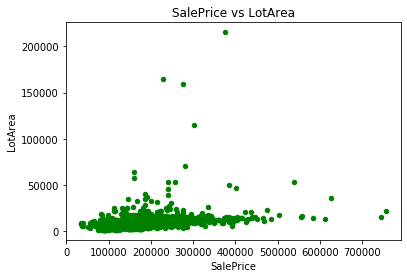

In [25]:
# scatterplotting the LotArea to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='LotArea',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.title('SalePrice vs LotArea')


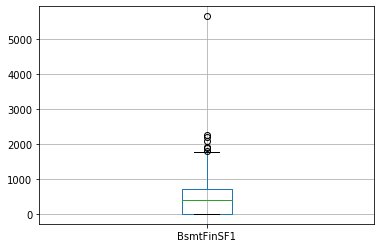

In [23]:
import matplotlib.pyplot as plt
house_train.boxplot(column ='BsmtFinSF1')

Text(0.5, 1.0, 'SalePrice vs MasVnrArea')

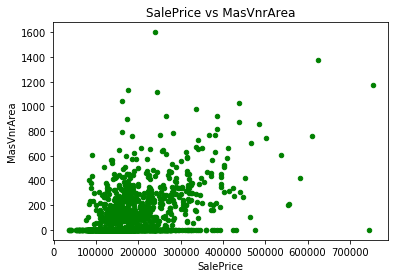

In [26]:
# scatterplotting the MasVnrArea to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='MasVnrArea',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('MasVnrArea')
plt.title('SalePrice vs MasVnrArea')


Text(0.5, 1.0, 'SalePrice vs BsmtFinSF1')

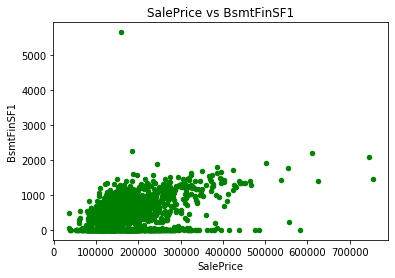

In [27]:
# scatterplotting the BsmtFinSF1 to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='BsmtFinSF1',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('BsmtFinSF1')
plt.title('SalePrice vs BsmtFinSF1')


Text(0.5, 1.0, 'SalePrice vs BsmtFinSF2')

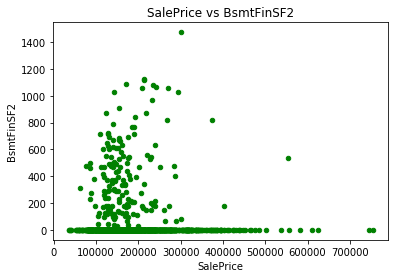

In [28]:
# scatterplotting the BsmtFinSF2 to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='BsmtFinSF2',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('BsmtFinSF2')
plt.title('SalePrice vs BsmtFinSF2')


Text(0.5, 1.0, 'SalePrice vs BsmtUnfSF')

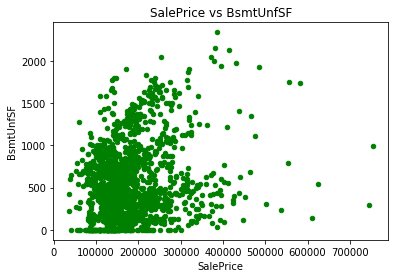

In [29]:
# scatterplotting the BsmtUnfSF to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='BsmtUnfSF',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('BsmtUnfSF')
plt.title('SalePrice vs BsmtUnfSF')


Text(0.5, 1.0, 'SalePrice vs TotalBsmtSF')

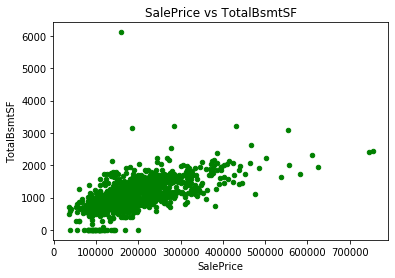

In [30]:
# scatterplotting the TotalBsmtSF to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='TotalBsmtSF',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('TotalBsmtSF')
plt.title('SalePrice vs TotalBsmtSF')


Text(0.5, 1.0, 'SalePrice vs X1stFlrSF')

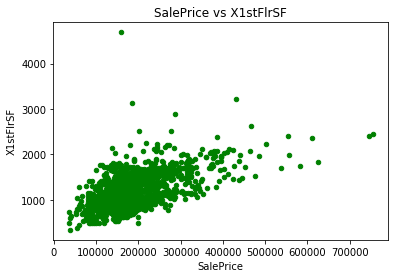

In [31]:
# scatterplotting the X1stFlrSF to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='X1stFlrSF',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('X1stFlrSF')
plt.title('SalePrice vs X1stFlrSF')

Text(0.5, 1.0, 'SalePrice vs X2ndFlrSF')

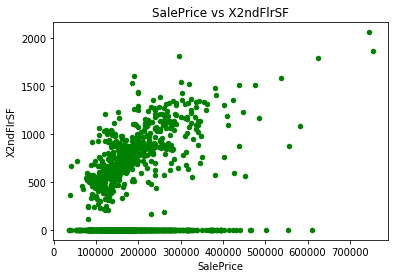

In [32]:
# scatterplotting the X2ndFlrSF to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='X2ndFlrSF',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('X2ndFlrSF')
plt.title('SalePrice vs X2ndFlrSF')

Text(0.5, 1.0, 'SalePrice vs GrLivArea')

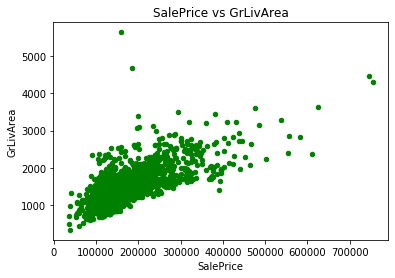

In [33]:
# scatterplotting the GrLivArea to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='GrLivArea',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('GrLivArea')
plt.title('SalePrice vs GrLivArea')

Text(0.5, 1.0, 'SalePrice vs GarageArea')

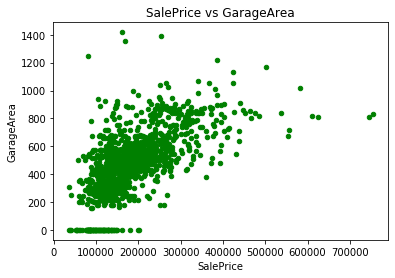

In [34]:
# scatterplotting the GarageArea to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='GarageArea',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('GarageArea')
plt.title('SalePrice vs GarageArea')

Text(0.5, 1.0, 'SalePrice vs WoodDeckSF')

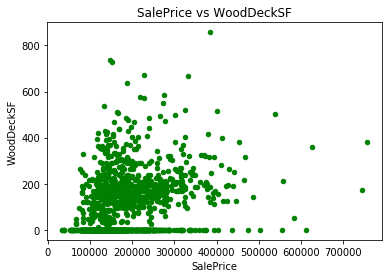

In [35]:
# scatterplotting the WoodDeckSF to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='WoodDeckSF',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('WoodDeckSF')
plt.title('SalePrice vs WoodDeckSF')

Text(0.5, 1.0, 'SalePrice vs PoolArea')

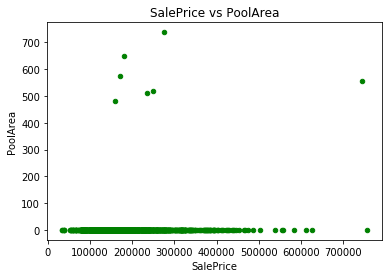

In [36]:
# scatterplotting the PoolArea to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='PoolArea',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('PoolArea')
plt.title('SalePrice vs PoolArea')

Text(0.5, 1.0, 'SalePrice vs MiscVal')

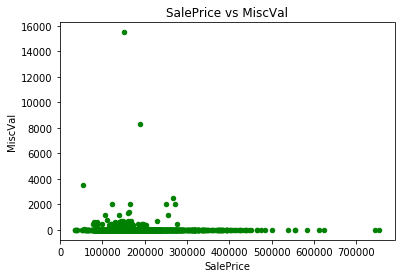

In [37]:
# scatterplotting the MiscVal to see the outliers

import matplotlib.pyplot as plt
house_train.plot(kind='scatter',x='SalePrice',y='MiscVal',alpha=1,color='green')
plt.xlabel('SalePrice')
plt.ylabel('MiscVal')
plt.title('SalePrice vs MiscVal')

# Define a function to cap the outliers on the given columns.

In [39]:

def cap_values(df):
    col_names = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','X1stFlrSF','X2ndFlrSF',
                 'GrLivArea','GarageArea','PoolArea','WoodDeckSF','MiscVal']
    for i in col_names:
        Qtr1 = df[i].quantile(0.25)
        Qtr3 = df[i].quantile(0.75)
        
        IQR = Qtr3 - Qtr1
        
        for j in range(len(df)):
            if df[i][j] < (Qtr1 - 1.5 * IQR):
                df[i][j] = Qtr1
            if df[i][j] > (Qtr3 + 1.5 * IQR):
                df[i][j] = Qtr3
        
        df[np.logical_or(df[i] < (Qtr1 - 1.5 * IQR),
                         df[i] > (Qtr3 + 1.5 * IQR))]
    return df

# cap the outliers using above function

In [40]:
house_train_new = cap_values(house_train)

C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anju\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [41]:
house_train_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,X3
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Other,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Other,Other,Other,0,2,2008,WD,Normal,208500,677
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Other,Other,Other,0,5,2007,WD,Normal,181500,5
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Other,Other,Other,0,9,2008,WD,Normal,223500,4
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Other,Other,Other,0,2,2006,WD,Abnorml,140000,67
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Other,Other,Other,0,12,2008,WD,Normal,250000,56


In [42]:
house_train_new.shape

(1460, 81)

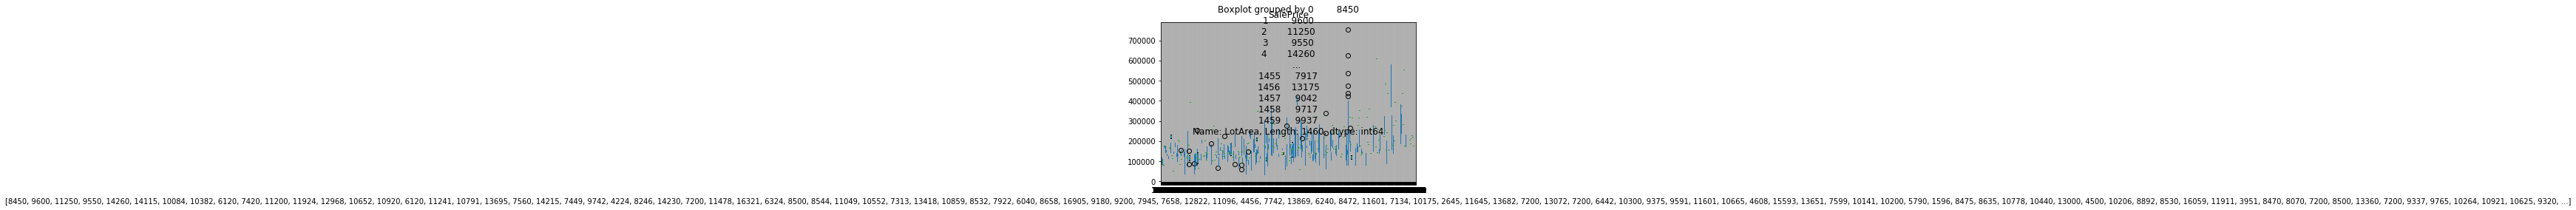

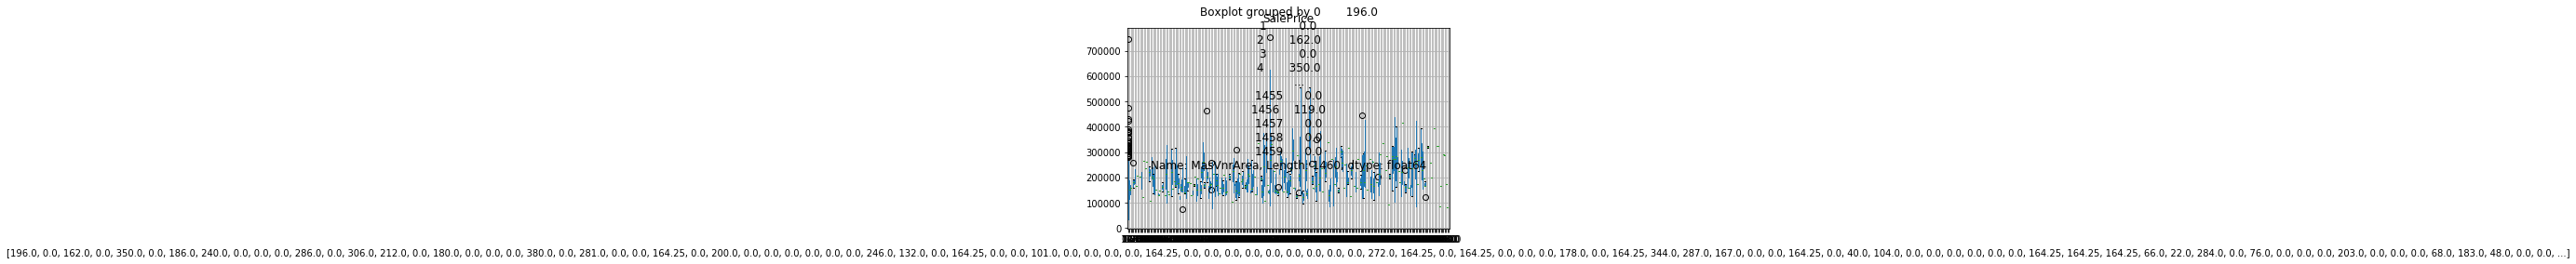

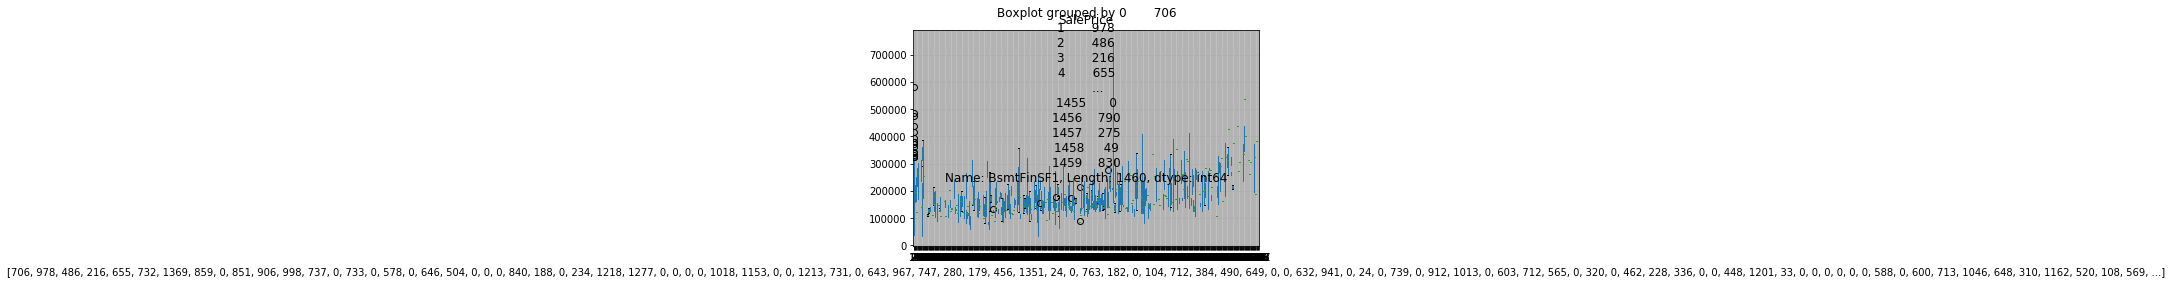

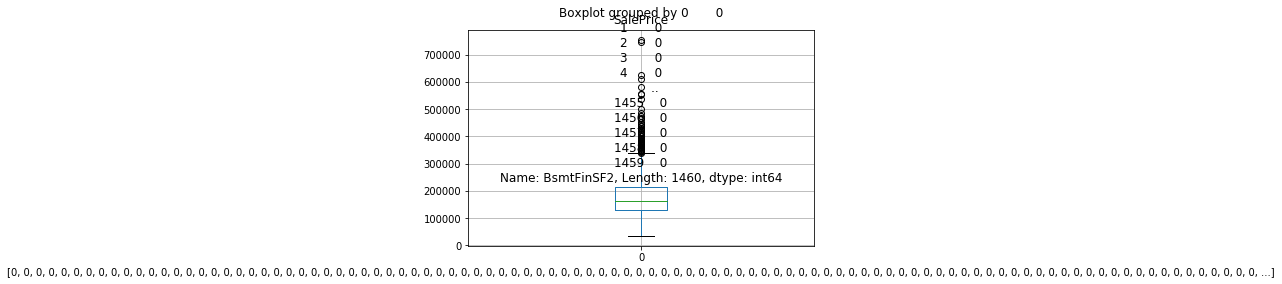

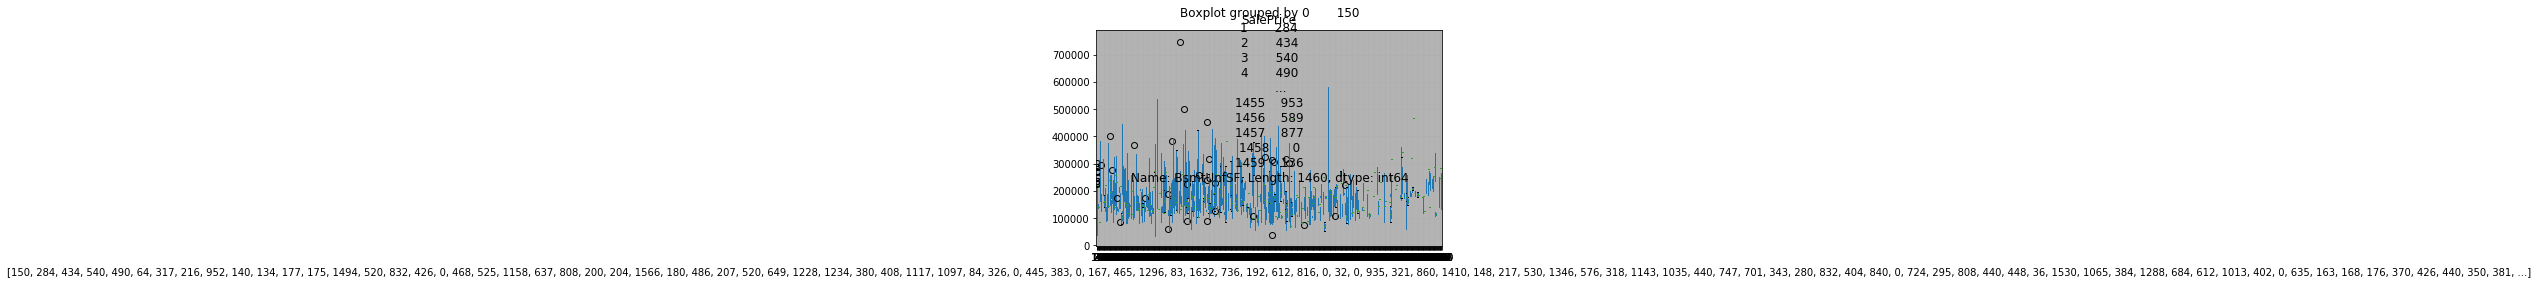

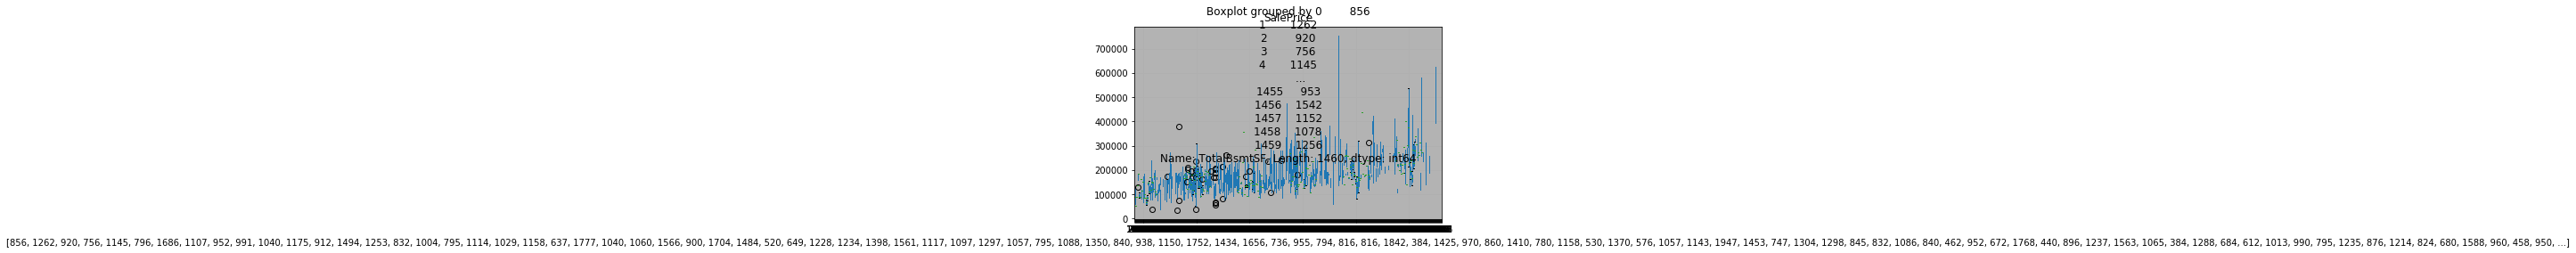

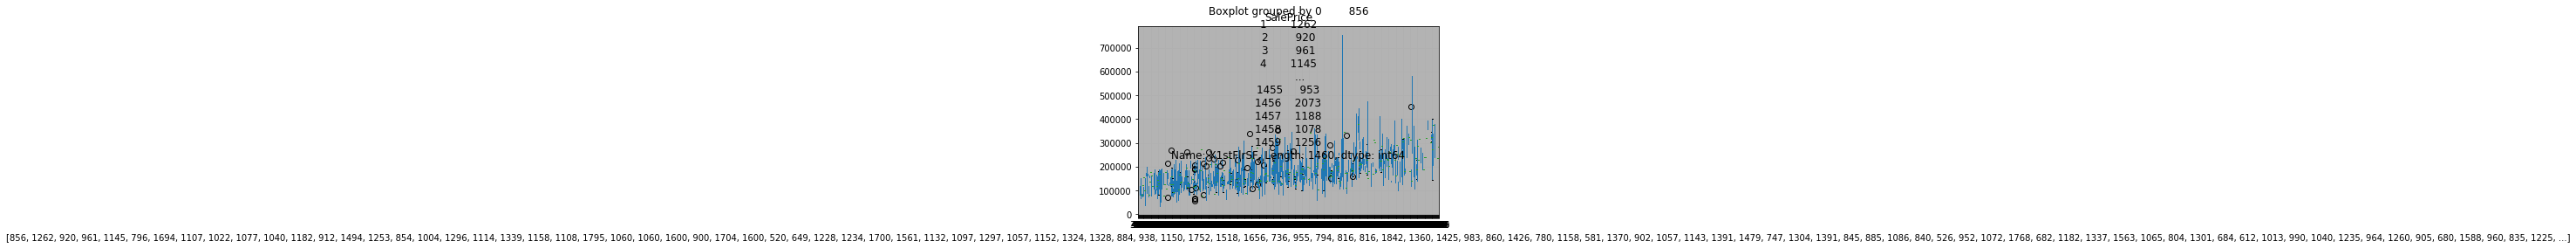

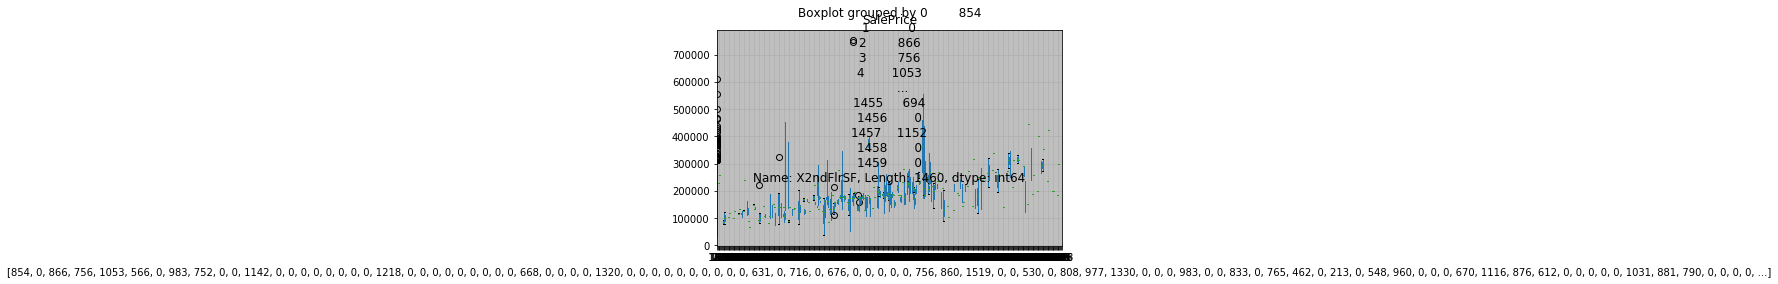

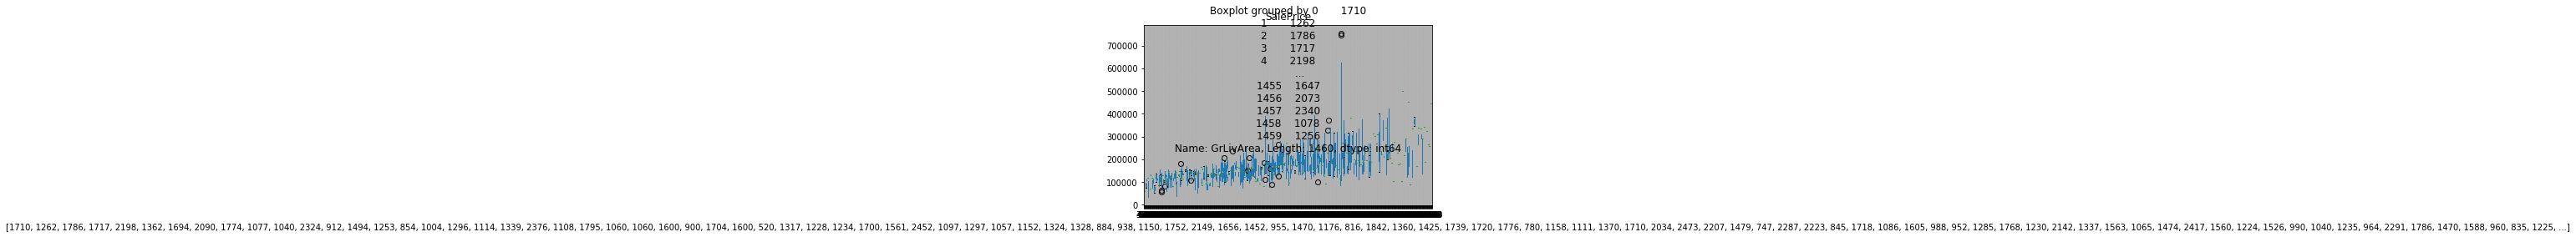

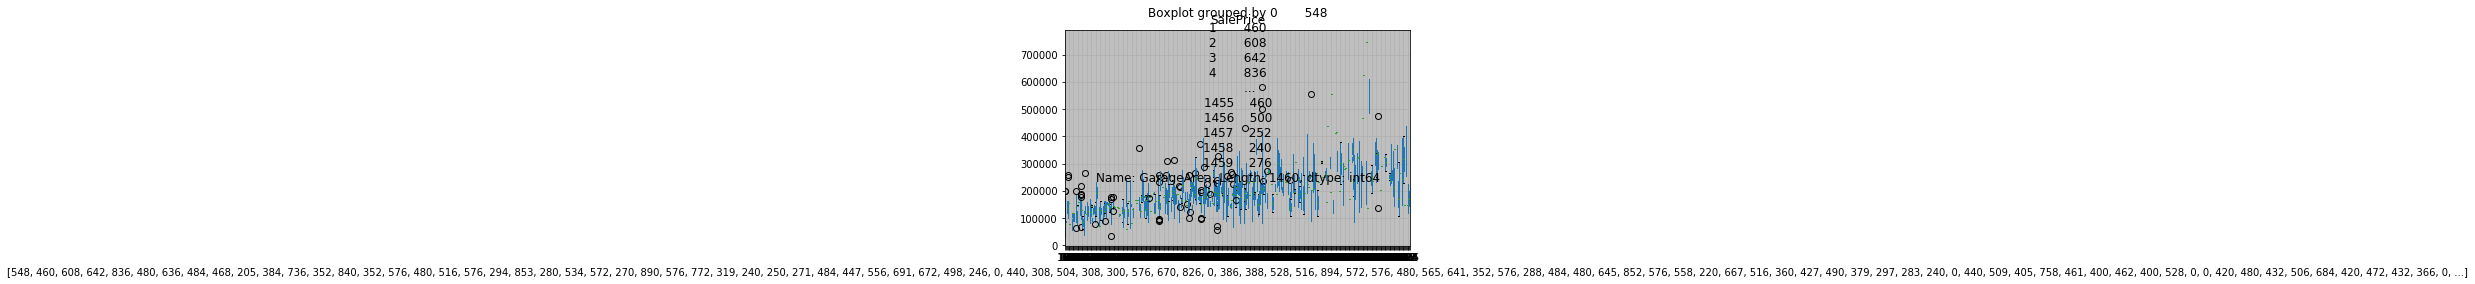

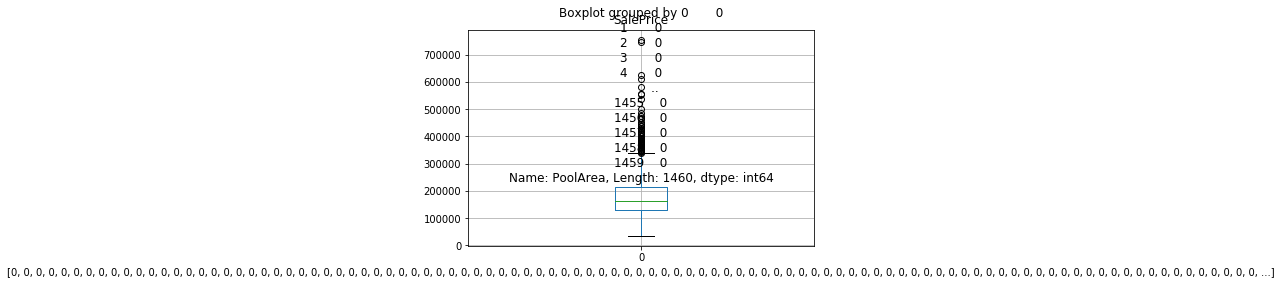

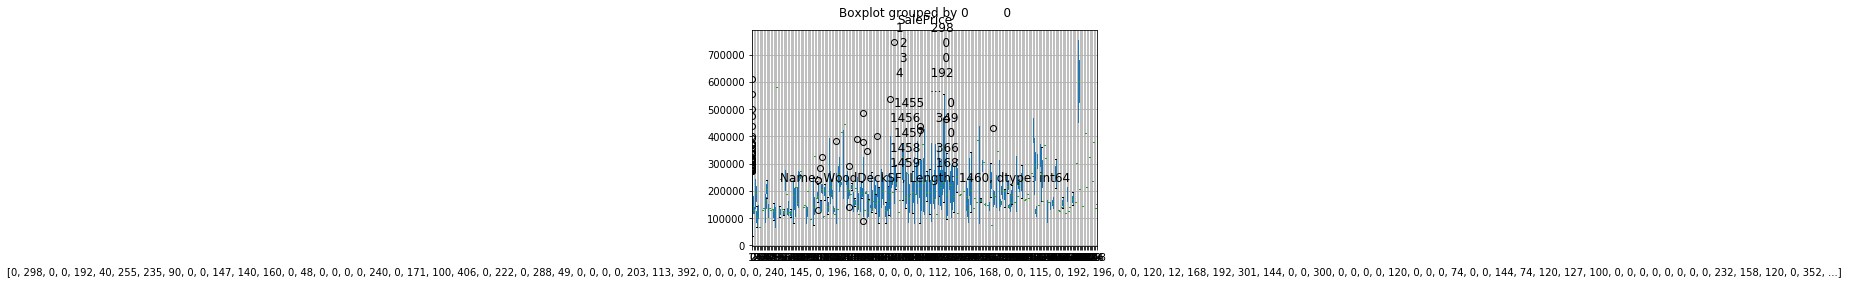

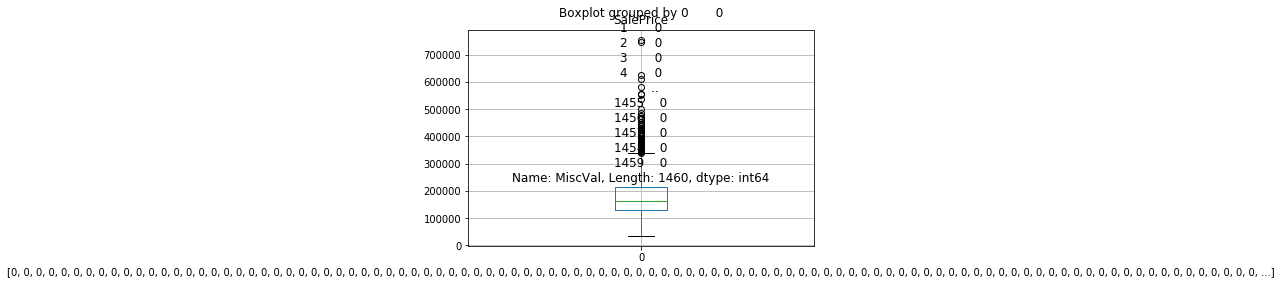

In [43]:
import matplotlib.pyplot as plt
col_names = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','X1stFlrSF','X2ndFlrSF',
             'GrLivArea','GarageArea','PoolArea','WoodDeckSF','MiscVal']
for i in col_names:
    house_train.boxplot(column='SalePrice',by=house_train[i])

In [12]:
import matplotlib.pyplot as plt
col_names = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','X1stFlrSF','X2ndFlrSF',
             'GrLivArea','GarageArea','PoolArea','WoodDeckSF','MiscVal']
for i in col_names:
    house_train.plot(kind = 'scatter', x ='SalePrice',y = house_train[i])

KeyError: "None of [Int64Index([ 8450,  9600, 11250,  9550, 14260, 14115, 10084, 10382,  6120,\n             7420,\n            ...\n             9000,  9262,  3675, 17217,  7500,  7917, 13175,  9042,  9717,\n             9937],\n           dtype='int64', length=1460)] are in the [columns]"

# convert the numeric fields which are categories to object data

In [44]:
house_train_new.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,X3
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Other,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Other,Other,Other,0,2,2008,WD,Normal,208500,677
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Other,Other,Other,0,5,2007,WD,Normal,181500,5
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Other,Other,Other,0,9,2008,WD,Normal,223500,4
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Other,Other,Other,0,2,2006,WD,Abnorml,140000,67
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Other,Other,Other,0,12,2008,WD,Normal,250000,56


In [60]:
house_train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null object
OverallCond      1460 non-null object
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      146

In [45]:
# we cannot pass the data in current numeric form as these are not supposed to be used in calculations.
# so first convert to string and then do one hot encoding by using pd.get.dummies to create zeroes and ones.

house_train_new['MSSubClass'] = house_train_new['MSSubClass'].astype(str)
house_train_new['LotFrontage'] = house_train_new['LotFrontage'].astype(str)
house_train_new['OverallQual'] = house_train_new['OverallQual'].astype(str)
house_train_new['OverallCond'] = house_train_new['OverallCond'].astype(str)
house_train_new['YearBuilt'] = house_train_new['YearBuilt'].astype(str)
house_train_new['YearRemodAdd'] = house_train_new['YearRemodAdd'].astype(str)
house_train_new['BsmtFullBath'] = house_train_new['BsmtFullBath'].astype(str)
house_train_new['BsmtHalfBath'] = house_train_new['BsmtHalfBath'].astype(str)
house_train_new['FullBath'] = house_train_new['FullBath'].astype(str)
house_train_new['HalfBath'] = house_train_new['HalfBath'].astype(str)
house_train_new['BedroomAbvGr'] = house_train_new['BedroomAbvGr'].astype(str)
house_train_new['KitchenAbvGr'] = house_train_new['KitchenAbvGr'].astype(str)
house_train_new['TotRmsAbvGrd'] = house_train_new['TotRmsAbvGrd'].astype(str)
house_train_new['Fireplaces'] = house_train_new['Fireplaces'].astype(str)
house_train_new['GarageYrBlt'] = house_train_new['GarageYrBlt'].astype(str)
house_train_new['GarageCars'] = house_train_new['GarageCars'].astype(str)
house_train_new['MoSold'] = house_train_new['MoSold'].astype(str)
house_train_new['YrSold'] = house_train_new['YrSold'].astype(str)

house_test['MSSubClass'] = house_test['MSSubClass'].astype(str)
house_test['LotFrontage'] = house_test['LotFrontage'].astype(str)
house_test['OverallQual'] = house_test['OverallQual'].astype(str)
house_test['OverallCond'] = house_test['OverallCond'].astype(str)
house_test['YearBuilt'] = house_test['YearBuilt'].astype(str)
house_test['YearRemodAdd'] = house_test['YearRemodAdd'].astype(str)
house_test['BsmtFullBath'] = house_test['BsmtFullBath'].astype(str)
house_test['BsmtHalfBath'] = house_test['BsmtHalfBath'].astype(str)
house_test['FullBath'] = house_test['FullBath'].astype(str)
house_test['HalfBath'] = house_test['HalfBath'].astype(str)
house_test['BedroomAbvGr'] = house_test['BedroomAbvGr'].astype(str)
house_test['KitchenAbvGr'] = house_test['KitchenAbvGr'].astype(str)
house_test['TotRmsAbvGrd'] = house_test['TotRmsAbvGrd'].astype(str)
house_test['Fireplaces'] = house_test['Fireplaces'].astype(str)
house_test['GarageYrBlt'] = house_test['GarageYrBlt'].astype(str)
house_test['GarageCars'] = house_test['GarageCars'].astype(str)
house_test['MoSold'] = house_test['MoSold'].astype(str)
house_test['YrSold'] = house_test['YrSold'].astype(str)



# encode the datasets for converting categorical features and this will create additional columns with zeroes and ones

In [46]:


house_train_encode = pd.get_dummies(house_train_new)



In [47]:
house_train_encode.shape

(1460, 762)

In [48]:
house_train_encode.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,X3,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_100.0,LotFrontage_101.0,LotFrontage_102.0,LotFrontage_103.0,LotFrontage_104.0,LotFrontage_105.0,LotFrontage_106.0,LotFrontage_107.0,LotFrontage_108.0,LotFrontage_109.0,LotFrontage_110.0,LotFrontage_111.0,LotFrontage_112.0,LotFrontage_114.0,LotFrontage_115.0,LotFrontage_116.0,LotFrontage_118.0,LotFrontage_120.0,LotFrontage_121.0,LotFrontage_122.0,LotFrontage_124.0,LotFrontage_128.0,LotFrontage_129.0,LotFrontage_130.0,LotFrontage_134.0,LotFrontage_137.0,LotFrontage_138.0,LotFrontage_140.0,LotFrontage_141.0,LotFrontage_144.0,LotFrontage_149.0,LotFrontage_150.0,LotFrontage_152.0,LotFrontage_153.0,LotFrontage_160.0,LotFrontage_168.0,LotFrontage_174.0,LotFrontage_182.0,LotFrontage_21.0,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_313.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,LotFrontage_37.0,LotFrontage_38.0,LotFrontage_39.0,LotFrontage_40.0,LotFrontage_41.0,LotFrontage_42.0,LotFrontage_43.0,LotFrontage_44.0,LotFrontage_45.0,LotFrontage_46.0,LotFrontage_47.0,LotFrontage_48.0,LotFrontage_49.0,LotFrontage_50.0,LotFrontage_51.0,LotFrontage_52.0,LotFrontage_53.0,LotFrontage_54.0,LotFrontage_55.0,LotFrontage_56.0,LotFrontage_57.0,LotFrontage_58.0,LotFrontage_59.0,LotFrontage_60.0,LotFrontage_61.0,LotFrontage_62.0,LotFrontage_63.0,LotFrontage_64.0,LotFrontage_65.0,LotFrontage_66.0,LotFrontage_67.0,LotFrontage_68.0,LotFrontage_69.0,LotFrontage_70.0,LotFrontage_70.04995836802665,LotFrontage_71.0,LotFrontage_72.0,LotFrontage_73.0,LotFrontage_74.0,LotFrontage_75.0,LotFrontage_76.0,LotFrontage_77.0,LotFrontage_78.0,LotFrontage_79.0,LotFrontage_80.0,LotFrontage_81.0,LotFrontage_82.0,LotFrontage_83.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_86.0,LotFrontage_87.0,LotFrontage_88.0,LotFrontage_89.0,LotFrontage_90.0,LotFrontage_91.0,LotFrontage_92.0,LotFrontage_93.0,LotFrontage_94.0,LotFrontage_95.0,LotFrontage_96.0,LotFrontage_97.0,LotFrontage_98.0,LotFrontage_99.0,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,Overa

# House_train has all the raw data- all columns- from the excel but with imputed values for missing ones.includes dependent variable salesprice.
# house_train_new has all the columns from house train with imputed values and additional capped values.includes dependent variable salesprice.
# house_train_encode has all the columns from house_train_new but with also with additional encoded columns.includes dependent variable salesprice.

In [49]:
# below we are separating the independent and dependnt variables
# house_train_inde has all variables except saleprice
# target has only dependent variable saleprice.

In [50]:
house_train_inde = house_train_encode.drop(['SalePrice'],axis=1)
target = house_train_encode['SalePrice']

In [51]:
house_train_inde.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,X3,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotFrontage_100.0,LotFrontage_101.0,LotFrontage_102.0,LotFrontage_103.0,LotFrontage_104.0,LotFrontage_105.0,LotFrontage_106.0,LotFrontage_107.0,LotFrontage_108.0,LotFrontage_109.0,LotFrontage_110.0,LotFrontage_111.0,LotFrontage_112.0,LotFrontage_114.0,LotFrontage_115.0,LotFrontage_116.0,LotFrontage_118.0,LotFrontage_120.0,LotFrontage_121.0,LotFrontage_122.0,LotFrontage_124.0,LotFrontage_128.0,LotFrontage_129.0,LotFrontage_130.0,LotFrontage_134.0,LotFrontage_137.0,LotFrontage_138.0,LotFrontage_140.0,LotFrontage_141.0,LotFrontage_144.0,LotFrontage_149.0,LotFrontage_150.0,LotFrontage_152.0,LotFrontage_153.0,LotFrontage_160.0,LotFrontage_168.0,LotFrontage_174.0,LotFrontage_182.0,LotFrontage_21.0,LotFrontage_24.0,LotFrontage_30.0,LotFrontage_313.0,LotFrontage_32.0,LotFrontage_33.0,LotFrontage_34.0,LotFrontage_35.0,LotFrontage_36.0,LotFrontage_37.0,LotFrontage_38.0,LotFrontage_39.0,LotFrontage_40.0,LotFrontage_41.0,LotFrontage_42.0,LotFrontage_43.0,LotFrontage_44.0,LotFrontage_45.0,LotFrontage_46.0,LotFrontage_47.0,LotFrontage_48.0,LotFrontage_49.0,LotFrontage_50.0,LotFrontage_51.0,LotFrontage_52.0,LotFrontage_53.0,LotFrontage_54.0,LotFrontage_55.0,LotFrontage_56.0,LotFrontage_57.0,LotFrontage_58.0,LotFrontage_59.0,LotFrontage_60.0,LotFrontage_61.0,LotFrontage_62.0,LotFrontage_63.0,LotFrontage_64.0,LotFrontage_65.0,LotFrontage_66.0,LotFrontage_67.0,LotFrontage_68.0,LotFrontage_69.0,LotFrontage_70.0,LotFrontage_70.04995836802665,LotFrontage_71.0,LotFrontage_72.0,LotFrontage_73.0,LotFrontage_74.0,LotFrontage_75.0,LotFrontage_76.0,LotFrontage_77.0,LotFrontage_78.0,LotFrontage_79.0,LotFrontage_80.0,LotFrontage_81.0,LotFrontage_82.0,LotFrontage_83.0,LotFrontage_84.0,LotFrontage_85.0,LotFrontage_86.0,LotFrontage_87.0,LotFrontage_88.0,LotFrontage_89.0,LotFrontage_90.0,LotFrontage_91.0,LotFrontage_92.0,LotFrontage_93.0,LotFrontage_94.0,LotFrontage_95.0,LotFrontage_96.0,LotFrontage_97.0,LotFrontage_98.0,LotFrontage_99.0,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_1,OverallQual_10,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallCond_1,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,O

In [52]:
target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# split the dataset into train/test

In [53]:

x_train, x_test, y_train, y_test = train_test_split(house_train_inde,
                                                    target,
                                                    test_size = 0.25,
                                                    random_state=1211)

# define function to calculate the accuracy and metrics

In [54]:

def calculate_accuracy(actual, predicted):
    SST = 0
    SSR = 0
    SSE = 0
    RMSE = 0
    VIF = 0
    RSqr = 0
    MAE = 0
    MAPE = 0
    SST = sum((actual - np.mean(predicted))**2)    # Calculate the SST
    SSR = sum((predicted - np.mean(predicted))**2) # Calculate the SSR
    SSE = sum((actual - predicted)**2)             # Calculate the SSE
    RMSE = np.sqrt((sum((predicted - actual)**2))/len(predicted))  # Calculate the RMSE
    RSqr = 1 - (SSE/SST)                           # Calcualte the R_square
    if RSqr != 1:
        VIF = 1 / (1 - RSqr)                           # Calculate the VIF
    #MAPE_house_price = mape(dtc_predict_train, y_train)           # Calculate the MAPE
    #MAE_house_price = mae(y_train, dtc_predict_train)             # Calculate the MAE
    return RMSE, RSqr, VIF


# Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lnrg = LinearRegression()

# create the model
lnrg.fit(x_train,y_train)

# prediction on train data and imputing less than 0 values with mean.
lnrg_predict_train = lnrg.predict(x_train)
lnrg_predict_train[lnrg_predict_train < 0] = lnrg_predict_train.mean()

# prediction on test data
lnrg_predict_test = lnrg.predict(x_test)
lnrg_predict_test[lnrg_predict_test < 0] = lnrg_predict_test.mean()

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,lnrg_predict_train)
print('Linear RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,lnrg_predict_test)
print('Linear RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Linear RMSE train =  13626.120896319831 R-Square train =  0.9703709570046661 VIF train =  33.75066822635767
Linear RMSE test =  233404101.9739714 R-Square test =  -81.18499435008052 VIF test =  0.012167671335965972


In [56]:
lnrg_predict_train

array([211672.55953979, 118943.61488724, 124957.37783432, ...,
       340001.86231995, 257671.23914719, 179613.74011612])

# Decision tree

In [57]:

from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state=1)

# choose some parameter combination to try
parameters = {'max_features' : ['log2','sqrt','auto'],
              'max_depth': [2,3,4,5,6,7,8],
              'min_samples_split': [10,20,30,40,50,60],
              'min_samples_leaf': [10,20,30,40]
             }

# type of scoring used to compare parameter combinations
acc_scorer = make_scorer(accuracy_score)

# run the grid search
#grid_obj = GridSearchCV(dtc,parameters,scoring = acc_scorer)
#grid_obj = grid_obj.fit(x_train,y_train)

# set the clf to the best combination of parametsrs
#dtc = grid_obj.best_estimator_

# create the model
dtc.fit(x_train,y_train)

# prediction on train data
dtc_predict_train = dtc.predict(x_train)

# prediction on test data
dtc_predict_test = dtc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,dtc_predict_train)
print('Decision Tree RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,dtc_predict_test)
print('Decision Tree RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Decision Tree RMSE train =  0.0 R-Square train =  1.0 VIF train =  0
Decision Tree RMSE test =  39170.664196389385 R-Square test =  0.7612807196532503 VIF test =  4.189020671256458


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
# Random forest model
rfc = RandomForestRegressor()

rfc.fit(x_train,y_train)

# prediction on train data
rfc_predict_train = rfc.predict(x_train)

# prediction on test data
rfc_predict_test = rfc.predict(x_test)

# calculate the accuracies
RMSE, RSqr, VIF = calculate_accuracy(y_train,rfc_predict_train)
print('Random Forest RMSE train = ',RMSE, 'R-Square train = ',RSqr, 'VIF train = ',VIF)

RMSE, RSqr, VIF = calculate_accuracy(y_test,rfc_predict_test)
print('Random Forest RMSE test = ',RMSE, 'R-Square test = ',RSqr, 'VIF test = ',VIF)

Random Forest RMSE train =  12227.316131084322 R-Square train =  0.9761419773467875 VIF train =  41.9146219506733
Random Forest RMSE test =  30510.363138504395 R-Square test =  0.8550927185686408 VIF test =  6.9009644658449245
